In [112]:
import math
import sympy as sp
import sympy  as sp
from sympy.matrices import Matrix
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import pi
import pprint
pp=pprint.PrettyPrinter(indent=5)

x,y,z,r,o=sp.symbols("x y z r theta")
#Tool Velocity Matrix


X_BR=sp.Matrix([[0],[-100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
X1_BR=sp.Matrix([[0],[40],[0],[0],[0],[0]])
X_FR=sp.Matrix([[0],[-100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
X1_FR=sp.Matrix([[0],[40],[0],[0],[0],[0]])
X_BL=sp.Matrix([[0],[-100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
X1_BL=sp.Matrix([[0],[40],[0],[0],[0],[0]])
X_FL=sp.Matrix([[0],[-100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
X1_FL=sp.Matrix([[0],[40],[0],[0],[0],[0]])


file_name='front_jump_gait.json'

theta_i, alpha_i, d_i, a_i, A_i, a_3, d_1, d_3, d_5, d_7 = sp.symbols('theta_i alpha_i d_i a_i A_i a_3 d_1, d_3, d_5, d_7')
theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7 = sp.symbols ('theta_1,theta_2, theta_3, theta_4, theta_5, theta_6, theta_7')
Rot_z = sp.Matrix([ [sp.cos(theta_i), -sp.sin(theta_i),0,0], [sp.sin(theta_i),sp.cos(theta_i),0,0], [0,0,1,0], [0,0,0,1] ]);
Rot_x = sp.Matrix([ [1,0,0,0], [0,sp.cos(alpha_i), -sp.sin(alpha_i),0], [0, sp.sin(alpha_i), sp.cos(alpha_i), 0], [0,0,0,1] ]); 
Tran_z = sp.Matrix([[1,0,0,0], [0,1,0,0], [0,0,1,d_i], [0,0,0,1]])
Tran_x = sp.Matrix([[1,0,0,a_i], [0,1,0,0], [0,0,1,0], [0,0,0,1]])

A_i=Rot_z*Tran_z*Tran_x*Rot_x

# Back Left Leg

BL_Ad0=A_i.subs([(theta_i,math.radians(90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
BL_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BL_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,64.85)])
BL_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,-140)])
BL_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
BL_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BL_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])

# Back Right Leg
BR_Ad0=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
BR_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BR_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(-90)),(a_i,0),(d_i,64.85)])
BR_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,140)])
BR_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
BR_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BR_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])


#Front Left Leg
FL_Ad0=A_i.subs([(theta_i,math.radians(90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
FL_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FL_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,64.85)])
FL_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,-140)])
FL_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
FL_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FL_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])


#Front Right Leg
FR_Ad0=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
FR_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FR_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(-90)),(a_i,0),(d_i,-64.85)])
FR_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,140)])
FR_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
FR_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FR_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])


T1=BR_Ad0*BR_A1
T2=BR_Ad0*BR_A1*BR_Ad1*BR_A2
T3=BR_Ad0*BR_A1*BR_Ad1*BR_A2*BR_Ad2*BR_A3
T4=BR_Ad0*BR_A1*BR_Ad1*BR_A2*BR_Ad2*BR_A3*BR_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_BR = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

T1=BL_Ad0*BL_A1
T2=BL_Ad0*BL_A1*BL_Ad1*BL_A2
T3=BL_Ad0*BL_A1*BL_Ad1*BL_A2*BL_Ad2*BL_A3
T4=BL_Ad0*BL_A1*BL_Ad1*BL_A2*BL_Ad2*BL_A3*BL_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_BL = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

T1=FL_Ad0*FL_A1
T2=FL_Ad0*FL_A1*FL_Ad1*FL_A2
T3=FL_Ad0*FL_A1*FL_Ad1*FL_A2*FL_Ad2*FL_A3
T4=FL_Ad0*FL_A1*FL_Ad1*FL_A2*FL_Ad2*FL_A3*FL_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_FL = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

T1=FR_Ad0*FR_A1
T2=FR_Ad0*FR_A1*FR_Ad1*FR_A2
T3=FR_Ad0*FR_A1*FR_Ad1*FR_A2*FR_Ad2*FR_A3
T4=FR_Ad0*FR_A1*FR_Ad1*FR_A2*FR_Ad2*FR_A3*FR_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_FR = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])





In [113]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
back_right_joint=[]
T=T4
x_tool_br=[]
y_tool_br=[]
z_tool_br=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=200:
    if i<100:
        X_eval=X_BR.subs(o,i)
    if i>100:
        X_eval=X1_BR.subs(o,j)
        j+=1
    back_right_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_br.append(T_eval[3])
    y_tool_br.append(T_eval[7])
    z_tool_br.append(T_eval[11])
    J_eval=J_BR.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
.........................................................................................................................................................................................................

In [114]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
front_right_joint=[]
T=T4
x_tool_fr=[]
y_tool_fr=[]
z_tool_fr=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=200:
    if i<100:
        X_eval=X_FR.subs(o,i)
    if i>100:
        X_eval=X1_FR.subs(o,j)
        j+=1
    front_right_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_fr.append(T_eval[3])
    y_tool_fr.append(T_eval[7])
    z_tool_fr.append(T_eval[11])
    J_eval=J_FR.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
.........................................................................................................................................................................................................

In [115]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
front_left_joint=[]
T=T4
x_tool_fl=[]
y_tool_fl=[]
z_tool_fl=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=200:
    if i<100:
        X_eval=X_FL.subs(o,i)
    if i>100:
        X_eval=X1_FL.subs(o,j)
        j+=1
    front_left_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_fl.append(T_eval[3])
    y_tool_fl.append(T_eval[7])
    z_tool_fl.append(T_eval[11])
    J_eval=J_FL.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
.........................................................................................................................................................................................................

In [116]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
back_left_joint=[]
T=T4
x_tool_bl=[]
y_tool_bl=[]
z_tool_bl=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=200:
    if i<100:
        X_eval=X_BL.subs(o,i)
    if i>100:
        X_eval=X1_BL.subs(o,j)
        j+=1
    back_left_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_bl.append(T_eval[3])
    y_tool_bl.append(T_eval[7])
    z_tool_bl.append(T_eval[11])
    J_eval=J_BL.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
.........................................................................................................................................................................................................

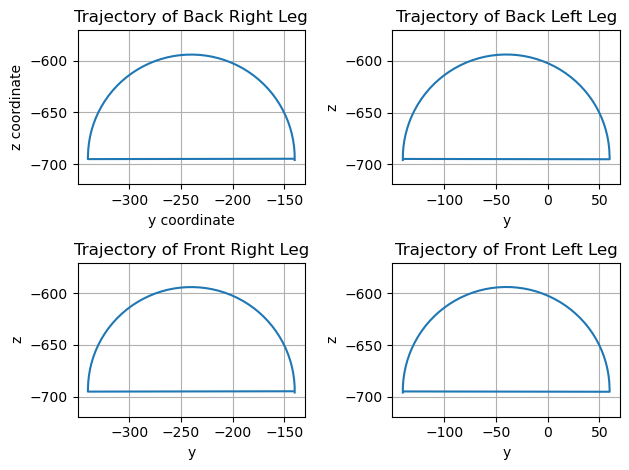

In [117]:
import matplotlib.pyplot as plt

# Create a grid of subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2)

# Plot 1: Top left subplot
axs[0, 0].plot(y_tool_br, z_tool_br)
axs[0, 0].set_xlabel("y coordinate")
axs[0, 0].set_ylabel("z coordinate")
axs[0, 0].set_title("Trajectory of Back Right Leg")
axs[0, 0].axis("equal")
axs[0, 0].grid(True)

# Plot 2: Top right subplot
axs[0, 1].plot(y_tool_bl, z_tool_bl)  # Replace with your desired plot
axs[0, 1].set_xlabel("y")
axs[0, 1].set_ylabel("z")
axs[0, 1].set_title("Trajectory of Back Left Leg")
axs[0, 1].axis("equal")
axs[0, 1].grid(True)
# Add other formatting and plotting commands as needed

# Plot 3: Bottom left subplot
axs[1, 0].plot(y_tool_fr, z_tool_fr)  # Replace with your desired plot
axs[1, 0].set_xlabel("y")
axs[1, 0].set_ylabel("z")
axs[1, 0].set_title("Trajectory of Front Right Leg")
axs[1, 0].axis("equal")
axs[1, 0].grid(True)
# Add other formatting and plotting commands as needed

# Plot 4: Bottom right subplot
axs[1, 1].plot(y_tool_fl, z_tool_fl)  # Replace with your desired plot
axs[1, 1].set_xlabel("y")
axs[1, 1].set_ylabel("z")
axs[1, 1].set_title("Trajectory of Front Left Leg")
axs[1,1].axis("equal")
axs[1,1].grid(True)
# Add other formatting and plotting commands as needed

# Adjust the layout to avoid overlapping titles and labels
fig.tight_layout()

# Show the plot
plt.show()

In [118]:
front_left_joint

[[0.0, -0.7, 1.5],
 [2.63651055134617e-9, -0.704388528480752, 1.50974151642953],
 [-0.000142432803074167, -0.708775532860887, 1.51948944219754],
 [-0.000429121413088249, -0.713157019125684, 1.52923509882388],
 [-0.000861774864888542, -0.717529015066097, 1.53896982509279],
 [-0.00144199298084137, -0.721887571421414, 1.54868497814956],
 [-0.00217125496754658, -0.726228763015526, 1.55837193460738],
 [-0.00305091032197462, -0.730548689904074, 1.56802209171041],
 [-0.00408216942810479, -0.734843478548914, 1.57762686859907],
 [-0.00526609386590932, -0.739109283035450, 1.58717770772195],
 [-0.00660358645912610, -0.743342286347416, 1.59666607643818],
 [-0.00809538109319243, -0.747538701712668, 1.60608346885288],
 [-0.00974203233995700, -0.751694774032464, 1.61542140792700],
 [-0.0115439049313219, -0.755806781405574, 1.62467144790149],
 [-0.0135011631297584, -0.759871036757378, 1.63382517707399],
 [-0.0156137600496446, -0.763883889582825, 1.64287422096469],
 [-0.0178814269895355, -0.76784172781

In [119]:
front_right_joint

[[0.0, -0.7, 1.5],
 [2.63651055151647e-9, -0.704388528480752, 1.50974151642953],
 [0.000142443372312894, -0.708720163764718, 1.51936641204017],
 [0.000429120634084675, -0.712991224568811, 1.52886632748627],
 [0.000861703240774591, -0.717198077064968, 1.53823297031496],
 [0.00144172042543628, -0.721337136283561, 1.54745811804383],
 [0.00217055159044597, -0.725404867678209, 1.55653362176038],
 [0.00304941583264211, -0.729397788854080, 1.56545141026189],
 [0.00407936128065162, -0.733312471460217, 1.57420349475104],
 [0.00526125429261590, -0.737145543244934, 1.58278197409873],
 [0.00659576856864421, -0.740893690271728, 1.59117904068124],
 [0.00808337423853512, -0.744553659291701, 1.59938698679491],
 [0.00972432699153855, -0.748122260266887, 1.60739821164659],
 [0.0115186573210914, -0.751596369037443, 1.61520522891341],
 [0.0134661599634438, -0.754972930124139, 1.62280067486013],
 [0.0155663836147891, -0.758248959656174, 1.63017731699724],
 [0.0178186210167926, -0.761421548412950, 1.6373280

In [120]:
back_left_joint

[[0.0, -0.7, 1.5],
 [2.63651055134617e-9, -0.704388528480752, 1.50974151642953],
 [-0.000142432803074167, -0.708775532860887, 1.51948944219754],
 [-0.000429121413088249, -0.713157019125684, 1.52923509882388],
 [-0.000861774864888542, -0.717529015066097, 1.53896982509279],
 [-0.00144199298084137, -0.721887571421414, 1.54868497814956],
 [-0.00217125496754658, -0.726228763015526, 1.55837193460738],
 [-0.00305091032197462, -0.730548689904074, 1.56802209171041],
 [-0.00408216942810479, -0.734843478548914, 1.57762686859907],
 [-0.00526609386590932, -0.739109283035450, 1.58717770772195],
 [-0.00660358645912610, -0.743342286347416, 1.59666607643818],
 [-0.00809538109319243, -0.747538701712668, 1.60608346885288],
 [-0.00974203233995700, -0.751694774032464, 1.61542140792700],
 [-0.0115439049313219, -0.755806781405574, 1.62467144790149],
 [-0.0135011631297584, -0.759871036757378, 1.63382517707399],
 [-0.0156137600496446, -0.763883889582825, 1.64287422096469],
 [-0.0178814269895355, -0.76784172781

In [121]:
back_right_joint

[[0.0, -0.7, 1.5],
 [2.63651055151647e-9, -0.704388528480752, 1.50974151642953],
 [0.000142443372312894, -0.708720163764718, 1.51936641204017],
 [0.000429120634084675, -0.712991224568811, 1.52886632748627],
 [0.000861703240774591, -0.717198077064968, 1.53823297031496],
 [0.00144172042543628, -0.721337136283561, 1.54745811804383],
 [0.00217055159044597, -0.725404867678209, 1.55653362176038],
 [0.00304941583264211, -0.729397788854080, 1.56545141026189],
 [0.00407936128065162, -0.733312471460217, 1.57420349475104],
 [0.00526125429261590, -0.737145543244934, 1.58278197409873],
 [0.00659576856864421, -0.740893690271728, 1.59117904068124],
 [0.00808337423853512, -0.744553659291701, 1.59938698679491],
 [0.00972432699153855, -0.748122260266887, 1.60739821164659],
 [0.0115186573210914, -0.751596369037443, 1.61520522891341],
 [0.0134661599634438, -0.754972930124139, 1.62280067486013],
 [0.0155663836147891, -0.758248959656174, 1.63017731699724],
 [0.0178186210167926, -0.761421548412950, 1.6373280